# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Observations
# 1: Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops.
# 2: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere.
# 3: Latitude doesn't have a correlation or strong influence on cloudiness in either hemisphere. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

608
608


In [4]:
# Create dataframe to store data
city_weather = pd.DataFrame({'City': cities, 'Country': countries,'Cloudiness': "", 'Date': "", 'Humidity': "",
                             'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,kumo,NG,,,,,,,
1,hobart,AU,,,,,,,
2,cherskiy,RU,,,,,,,
3,mirnyy,RU,,,,,,,
4,la ronge,CA,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Variables to keep track of response number
#Setting at 1 to use 1-50 rather than 0-49 
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + ',' '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
        
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(10)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Kumo
Processing Weather Data for Record 2 of Set 1 | Hobart
Processing Weather Data for Record 3 of Set 1 | Cherskiy
Processing Weather Data for Record 4 of Set 1 | Mirny
Processing Weather Data for Record 5 of Set 1 | La Ronge
Processing Weather Data for Record 6 of Set 1 | Tiksi
Processing Weather Data for Record 7 of Set 1 | Kapaa
Processing Weather Data for Record 8 of Set 1 | Muborak
Processing Weather Data for Record 9 of Set 1 | Chokurdakh
Processing Weather Data for Record 10 of Set 1 | Albany
Processing Weather Data for Record 11 of Set 1 | Olinda
Processing Weather Data for Record 12 of Set 1 | Saint-Philippe
Processing Weather Data for Record 13 of Set 1 | Rikitea
Processing Weather Data for Record 14 of Set 1 | Hasaki
Processing Weather Data for Record 15 of Set 1 | Kudahuvadhoo
Processing Weather Data for Record 16 of Set 1 | High Level
Proc

Processing Weather Data for Record 36 of Set 3 | Galesong
Processing Weather Data for Record 37 of Set 3 | Bodden Town
Processing Weather Data for Record 38 of Set 3 | Nanortalik
Processing Weather Data for Record 39 of Set 3 | Santa Fe
Processing Weather Data for Record 40 of Set 3 | Franklin
Processing Weather Data for Record 41 of Set 3 | Alugan
Processing Weather Data for Record 42 of Set 3 | Verāval
Processing Weather Data for Record 43 of Set 3 | Vardø
Processing Weather Data for Record 44 of Set 3 | Mountain Home
Processing Weather Data for Record 45 of Set 3 | Tibati
Processing Weather Data for Record 46 of Set 3 | Vidim
Processing Weather Data for Record 47 of Set 3 | Poronaysk
Processing Weather Data for Record 48 of Set 3 | Sinnamary
Processing Weather Data for Record 49 of Set 3 | Cidreira
Processing Weather Data for Record 50 of Set 3 | Los Llanos de Aridane
City not found....Skipping............
Processing Weather Data for Record 1 of Set 4 | Souillac
Processing Weather D

Processing Weather Data for Record 20 of Set 6 | Ambon City
Processing Weather Data for Record 21 of Set 6 | Port Hardy
Processing Weather Data for Record 22 of Set 6 | Luocheng
Processing Weather Data for Record 23 of Set 6 | Olutanga
Processing Weather Data for Record 24 of Set 6 | Ambatofinandrahana
Processing Weather Data for Record 25 of Set 6 | Zhicheng
Processing Weather Data for Record 26 of Set 6 | Conde
Processing Weather Data for Record 27 of Set 6 | Geraldton
Processing Weather Data for Record 28 of Set 6 | Ilulissat
Processing Weather Data for Record 29 of Set 6 | Praia
Processing Weather Data for Record 30 of Set 6 | Souris
Processing Weather Data for Record 31 of Set 6 | Fortuna
Processing Weather Data for Record 32 of Set 6 | Kavaratti
Processing Weather Data for Record 33 of Set 6 | Picuí
Processing Weather Data for Record 34 of Set 6 | Khandyga
Processing Weather Data for Record 35 of Set 6 | Nouadhibou
Processing Weather Data for Record 36 of Set 6 | Carndonagh
Proce

Processing Weather Data for Record 4 of Set 9 | Prince Rupert
City not found....Skipping............
Processing Weather Data for Record 5 of Set 9 | Mnogovershinnyy
Processing Weather Data for Record 6 of Set 9 | Sālūmbar
Processing Weather Data for Record 7 of Set 9 | Kalmar
Processing Weather Data for Record 8 of Set 9 | Port-Gentil
Processing Weather Data for Record 9 of Set 9 | Maragogi
Processing Weather Data for Record 10 of Set 9 | Agoura Hills
Processing Weather Data for Record 11 of Set 9 | Kilinochchi
Processing Weather Data for Record 12 of Set 9 | Assiniboia
Processing Weather Data for Record 13 of Set 9 | Shaowu
Processing Weather Data for Record 14 of Set 9 | Moose Factory
Processing Weather Data for Record 15 of Set 9 | Inuvik
Processing Weather Data for Record 16 of Set 9 | Edd
Processing Weather Data for Record 17 of Set 9 | Honiara
Processing Weather Data for Record 18 of Set 9 | Kokopo
Processing Weather Data for Record 19 of Set 9 | Jalu
Processing Weather Data for 

Processing Weather Data for Record 38 of Set 11 | Iisalmi
Processing Weather Data for Record 39 of Set 11 | Rio Bananal
Processing Weather Data for Record 40 of Set 11 | Yaypan
Processing Weather Data for Record 41 of Set 11 | Dabra
Processing Weather Data for Record 42 of Set 11 | Khamamatyurt
Processing Weather Data for Record 43 of Set 11 | Pangai
Processing Weather Data for Record 44 of Set 11 | Dunedin
Processing Weather Data for Record 45 of Set 11 | Portage
Processing Weather Data for Record 46 of Set 11 | Zlobin
Processing Weather Data for Record 47 of Set 11 | Vostok
Processing Weather Data for Record 48 of Set 11 | Atlantic City
Processing Weather Data for Record 49 of Set 11 | Jumla
Processing Weather Data for Record 50 of Set 11 | Ambāgarh Chauki
Processing Weather Data for Record 1 of Set 12 | Gambēla
Processing Weather Data for Record 2 of Set 12 | Ondarroa
Processing Weather Data for Record 3 of Set 12 | Moreira Sales
City not found....Skipping............
Processing Wea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#weather_data = pd.DataFrame(city_weather)
city_weather.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,kumo,NG,20,1603213051,28,10.04,11.21,95,4.7
1,hobart,AU,90,1603213047,81,-42.88,147.33,53.6,5.82
2,cherskiy,RU,70,1603213052,95,68.75,161.3,18.63,4.52
3,mirnyy,RU,90,1603213052,92,62.54,113.96,19.4,4.47
4,la ronge,CA,90,1603213052,68,55.1,-105.28,24.8,3.36


In [8]:
# Export & Save Data Into a .csv.
#city_weather.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Preview the dataframe
city_weather.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,kumo,NG,20,1603213051,28,10.04,11.21,95.00,4.7
1,hobart,AU,90,1603213047,81,-42.88,147.33,53.60,5.82
2,cherskiy,RU,70,1603213052,95,68.75,161.3,18.63,4.52
3,mirnyy,RU,90,1603213052,92,62.54,113.96,19.40,4.47
4,la ronge,CA,90,1603213052,68,55.1,-105.28,24.80,3.36


In [11]:
# Export & Save Data Into a .csv.
city_weather.to_csv("output_data/cities.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

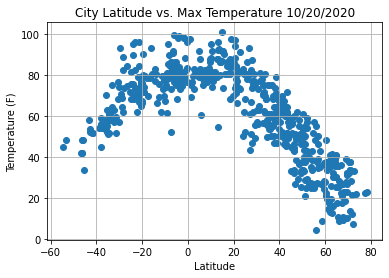

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

In [ ]:
# Latitude vs Temperature plot shows a correlation between the latitude and temperature.

## Latitude vs. Humidity Plot

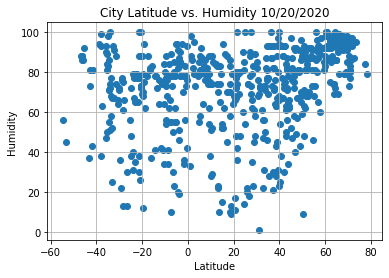

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

In [ ]:
#In this Latitude vs Humidity plot we see there is not relation between latitude and humdity.

## Latitude vs. Cloudiness Plot

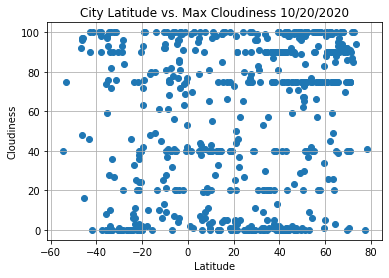

In [14]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

In [ ]:
#Latitude vs Cloudiness shows no direct relation between the two factors.

## Latitude vs. Wind Speed Plot

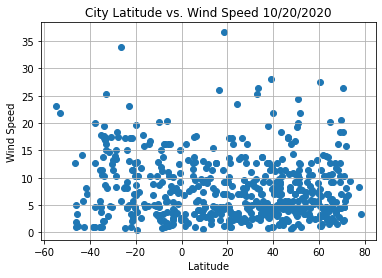

In [15]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

In [ ]:
#Latitude vs Wind Speed there is a relation between latitude and wind speed but not as strong of a correlation as temperature.

## Linear Regression

In [16]:
# Define northern southern hemisphere
northern_hemisphere = city_weather.loc[city_weather["Lat"] >= 0]
southern_hemisphere = city_weather.loc[city_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7789124011098575


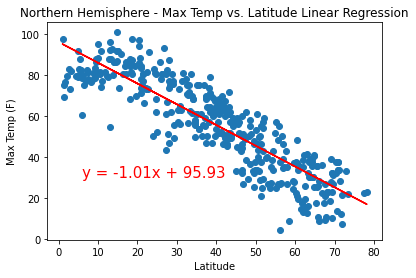

In [17]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere["Max Temp"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [ ]:
#Based on the high r-squared value Temperature and Latitude are related for the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5560668760678068


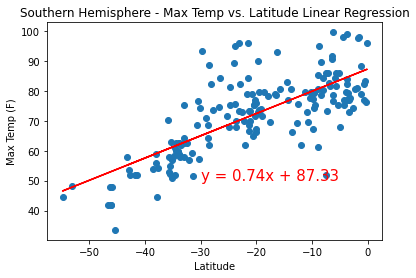

In [18]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere["Max Temp"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [ ]:
#The r-squared value for Temperature and Latitude are acceptable but not as strong as the Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1280514239500452


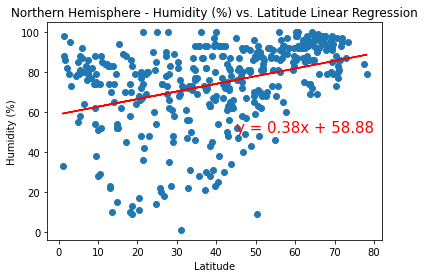

In [21]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere["Humidity"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [ ]:
#This plot shows there is not a strong relation between Latitude and Humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005672497041682032


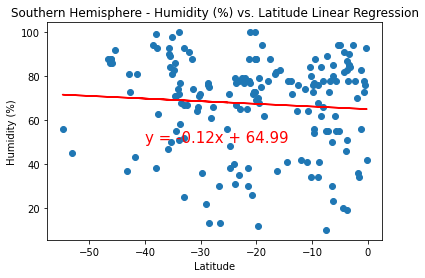

In [23]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere["Humidity"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [ ]:
#This plot is ever more sparce than the Northern Hemisphere and shows no strong relation between Latitude and Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.020276104091778394


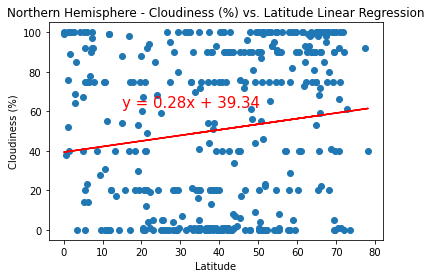

In [21]:
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere["Cloudiness"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,62),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [ ]:
#There is not strong connection between Latitude and Cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0030400301561282184


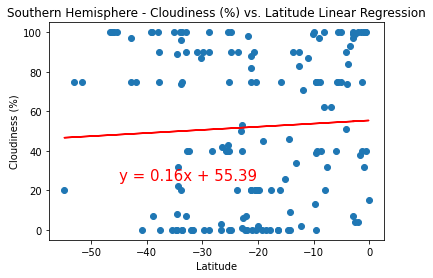

In [22]:
# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere["Cloudiness"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [ ]:
#This plot is even further spread out than the Northen Hemisphere and has no strong connection between Latitude and Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 5.762008668023229e-05


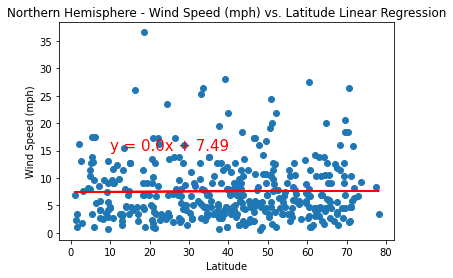

In [24]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"].astype(float)
y_values = northern_hemisphere["Windspeed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

In [ ]:
#This plot shows a relation between Latitude and Wind Speed in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03276729244075031


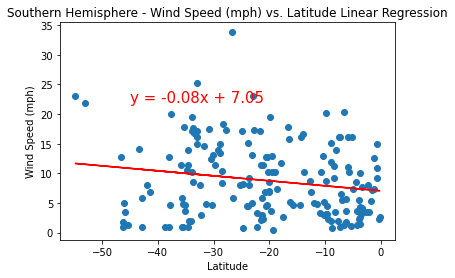

In [27]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"].astype(float)
y_values = southern_hemisphere["Windspeed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
#plt.show()

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

In [ ]:
#The Southern Hemisphere shows less of a correlation between Latitude and Wind Speed in the Southern Hemisphere.